In [1]:
import os

In [3]:
import pandas as pd
df = pd.read_csv("금융기사목록.csv", encoding='cp949', engine = "python")
df.head()

,기사제목,신문사,작성일자
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01
1,코스피 상단 28003100,서울경제,2018-01-01
2,한숨 동부대우전자 중동,서울경제,2018-01-01
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01


In [4]:
# 월 추출
df['월'] = df['작성일자'].str.split('-', expand = True).iloc[:, 1]
df['월']

0       01
1       01
2       01
3       01
4       01
        ..
6208    12
6209    12
6210    12
6211    12
6212    12
Name: 월, Length: 6213, dtype: object

In [5]:
grouped_df = df.groupby(['월'], as_index = False)['작성일자'].count()
grouped_df

,월,작성일자
0,01,522
1,02,465
2,03,499
3,04,539
4,05,527
5,06,528
6,07,563
7,08,548
8,09,548
9,10,550


In [7]:
df['기사제목'].head()

0                       휴장일 슬쩍올빼미 공시 주의보
1                        코스피 상단 28003100
2                           한숨 동부대우전자 중동
3    금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다
4         금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속
Name: 기사제목, dtype: object

In [11]:
df['기사제목'].str.split(' ', expand = False).sum()[:10]

['휴장일', '슬쩍올빼미', '공시', '주의보', '코스피', '상단', '28003100', '한숨', '동부대우전자', '중동']

In [12]:
word_list = df['기사제목'].str.split(' ', expand = False).sum()
word_list = pd.Series(word_list) 
word_list.value_counts().iloc[:10] # 빈도가 높은 상위 10개를 출력

코스피     815
증시      745
상승      390
하락      350
코스닥     252
美       224
우려      215
마켓뷰     205
오전시황    190
환율      184
dtype: int64

In [13]:
# 상위 10개 외에 나머지 갯수 합
other_occur = word_list.value_counts().iloc[11:].sum()
other_occur

30008

In [14]:
#전체 리스트중에 상위 10개만 추출
major_word_list = word_list.value_counts().iloc[:10]
# 나머지 합계 값 other_pccur를 추가
major_word_list['기타'] = other_occur
major_word_list

코스피       815
증시        745
상승        390
하락        350
코스닥       252
美         224
우려        215
마켓뷰       205
오전시황      190
환율        184
기타      30008
dtype: int64

In [15]:
other_occur = word_list.value_counts().iloc[11:].sum()
major_word_list = word_list.value_counts().iloc[:10]

In [17]:
major_word_list

코스피     815
증시      745
상승      390
하락      350
코스닥     252
美       224
우려      215
마켓뷰     205
오전시황    190
환율      184
dtype: int64

In [16]:
other_occur

30008

In [18]:
major_word_list['기타'] = other_occur

In [21]:
major_word_list

코스피       815
증시        745
상승        390
하락        350
코스닥       252
美         224
우려        215
마켓뷰       205
오전시황      190
환율        184
기타      30008
dtype: int64

([<matplotlib.patches.Wedge at 0x1f03e8fa128>,
 [Text(-0.7557875035693594, 0.26226942148942095, '기타'),
  Text(0.7557875097082181, -0.2622694037989376, '주요단어')],
 [Text(-0.5668406276770195, 0.19670206611706567, '89.4%'),
  Text(0.5668406322811635, -0.19670205284920317, '10.6%')])

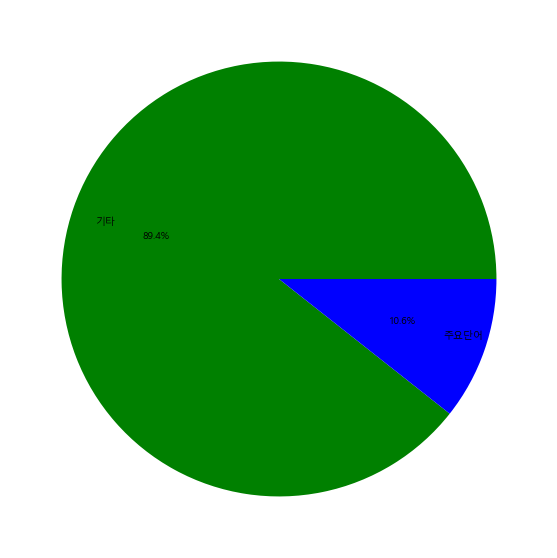

In [22]:
# 주요 단어 비율 시각화
plt.rcParams["figure.figsize"] = (10, 10)
plt.pie(x = [major_word_list['기타'], major_word_list.iloc[:-1].sum()],
        labels = ['기타', '주요단어'],
        colors = ['green', 'blue'],
       labeldistance = 0.8,
       autopct = '%1.1f%%')

#### 월별 주요 단어 출현 빈도 시각화

In [16]:
major_word_list = major_word_list.iloc[:-1] # 기타 제외

In [17]:
df.head()

,기사제목,신문사,작성일자,월
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01,01
1,코스피 상단 28003100,서울경제,2018-01-01,01
2,한숨 동부대우전자 중동,서울경제,2018-01-01,01
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01,01
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01,01


In [18]:
major_word_list.index

Index(['코스피', '증시', '상승', '하락', '코스닥', '美', '우려', '마켓뷰', '오전시황', '환율'], dtype='object')

In [19]:
#major_work_list에 있는 값들을 모두 컬럼에 새로 추가한다
#해당 값이 해당 행의 기사제목에 포함되어있으면 true값을 넣는다
#그리고 각 컬럼별 등장횟수 합계를 append를 이용해 배열에 저장
new_cols = []
for col in major_word_list.index:
    df[col + "_등장횟수"] = df['기사제목'].str.contains(col) # 새로운 컬럼 추가
    new_cols.append(col + "_등장횟수")

df.head()

,기사제목,신문사,작성일자,월,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,우려_등장횟수,마켓뷰_등장횟수,오전시황_등장횟수,환율_등장횟수
0,휴장일 슬쩍올빼미 공시 주의보,서울경제,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
1,코스피 상단 28003100,서울경제,2018-01-01,01,True,False,False,False,False,False,False,False,False,False
2,한숨 동부대우전자 중동,서울경제,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
3,금융투자업계 지도 생존 성장 운용자문사 대주주교체 카드 꺼내든다,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,False,False,False,False
4,금융투자업계 지도 모험자본 확충 원년 초대형 질주 계속,파이낸셜뉴스,2018-01-01,01,False,False,False,False,False,False,False,False,False,False


In [20]:
# 월별로 컬럼별 단어 등장 횟수를 나타낸다. groupby활용
grouped_df = df.groupby('월', as_index = False)[new_cols].sum()
grouped_df

,월,코스피_등장횟수,증시_등장횟수,상승_등장횟수,하락_등장횟수,코스닥_등장횟수,美_등장횟수,우려_등장횟수,마켓뷰_등장횟수,오전시황_등장횟수,환율_등장횟수
0,01,112,81,67,43,154,29,6,20,19,34
1,02,100,136,74,38,50,72,16,18,14,22
2,03,138,104,48,43,38,90,54,23,20,16
3,04,152,106,68,55,48,61,25,13,22,30
4,05,106,113,62,67,38,35,22,12,13,19
5,06,80,154,54,54,19,40,23,17,5,25
6,07,90,126,52,49,54,42,24,20,16,30
7,08,96,113,47,35,24,51,15,22,22,24
8,09,65,97,35,37,30,59,25,16,13,13
9,10,119,172,45,56,30,59,19,12,15,31
